# Aula 2 - Machine Learning

## Exercício de fixação II / Desafio I - Regressão Linear e Árvore de Decisão

### Prof. Dr. José Ahirton Lopes

Esse notebook compreende exercício a partir da utilização de regressão linear.

Nosso exercício é uma regressão linear simples, analisando peso, altura e sexo biológico de 200 pessoas:

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline

Vamos começar lendo os dados do arquivo .csv denominado "weights.csv":

In [2]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving weights.csv to weights.csv
User uploaded file "weights.csv" with length 2022 bytes


In [3]:
pesos = pd.read_csv('weights.csv', sep=';')

Agora vamos performar alguns passos de análise exploratória, uma das bases da análise em Ciência de Dados e que também nos prepara para o termos um melhor funcionamento e entendimento quanto a nossos algoritmos de IA. 

O primeiro passo é verificar uma parte (5 primeiros registros) que compõem nosso dataframe:

In [4]:
pesos.head()

,sex,weight,height
0,M,77,182
1,F,58,161
2,F,53,161
3,M,68,177
4,F,59,157


Agora, a partir do describe do Python, também podemos ter acesso a informações tais como quantidade geral de itens de dados, média, média ponderada, máximo e mínimo bem como nossos primeiro, segundo e terceiro quartis, 25%, 50% e 75%:

In [5]:
pesos.describe()

,weight,height
count,200.000000,200.00000
mean,65.770000,170.46500
std,14.899567,9.09408
min,39.000000,146.00000
25%,55.000000,164.00000
50%,63.000000,169.50000
75%,74.000000,177.25000
max,160.000000,197.00000


A partir do exposto, também podemos verificar valores específicos a partir de características específicas tal como verificar qual o máximo da característica (atributo) peso (weight) para o atributo sexo (sex) se constar como feminino (F). Exemplo:

In [6]:
pesos.loc[pesos.sex=='F']['weight'].max()

160

In [7]:
pesos['sex'].value_counts()

F    112
M     88
Name: sex, dtype: int64

Para ter mais possibilidades de análise de nossos dados uma boa prática é verificar nossos histogramas a partir de nosso dataframe. O modo mais simples de se fazer um histograma é do seguinte modo:

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3c591f8150>,
      dtype=object)

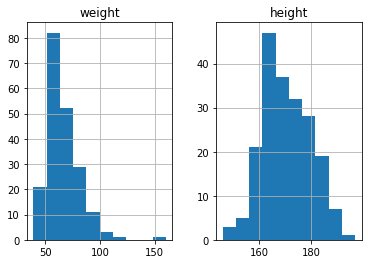

In [8]:
pesos.hist()

In [9]:
pesos.dtypes

sex       object
weight     int64
height     int64
dtype: object

In [10]:
pesos.shape

(200, 3)

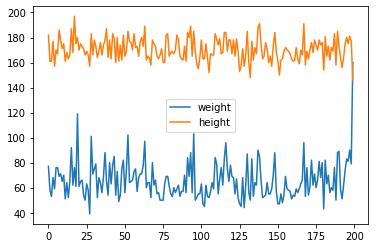

In [11]:
pesos.plot()

A fim de obtermos mais detalhes sobre os dados numéricos, podemos usar o método describe() novamente:

In [12]:
pesos.describe()

,weight,height
count,200.000000,200.00000
mean,65.770000,170.46500
std,14.899567,9.09408
min,39.000000,146.00000
25%,55.000000,164.00000
50%,63.000000,169.50000
75%,74.000000,177.25000
max,160.000000,197.00000


Com isso, obtemos o número de exemplos, a média de cada atributo, desvio padrão, valor mínimo, primeiro, segundo e terceiro quartil e valor máximo do atributo, respectivamente.

Para valores discretos podemos usar o método value_counts()

In [13]:
pesos.sex.value_counts()

F    112
M     88
Name: sex, dtype: int64

Logo, temos que nesta base temos 112 pessoas do sexo feminino e 88 do sexo masculino.

Vamos visualizar esses dados graficamente:

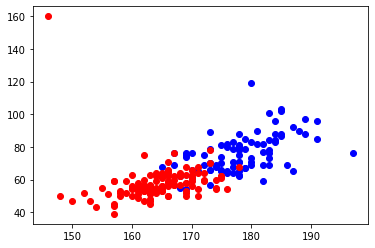

In [14]:
plt.scatter(x=pesos.loc[pesos.sex=='M', 'height'], 
            y=pesos.loc[pesos.sex=='M', 'weight'], c='blue')
plt.scatter(x=pesos.loc[pesos.sex=='F', 'height'], 
            y=pesos.loc[pesos.sex=='F', 'weight'], c='red')

Aqui encontramos um problema. 

Existem alguns pontos muito fora da distribuição de dados (160, 120); esses pontos são nossos outliers. 

Eles podem prejudicar o modelo, porque forçarão a reta para próximo deles. 

Iremos então removê-los.

<br>Veja também que os pesos das pessoas de sexo masculino estão deslocados para a direita, o que indica uma tendência de homens serem mais pesados que as mulheres. Nosso modelo nos mostrará isso.

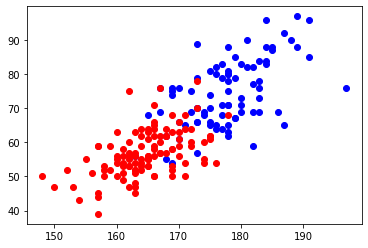

In [15]:
pesos = pesos[pesos.weight <= 100]
plt.scatter(x=pesos.loc[pesos.sex=='M', 'height'], 
            y=pesos.loc[pesos.sex=='M', 'weight'], c='blue')
plt.scatter(x=pesos.loc[pesos.sex=='F', 'height'], 
            y=pesos.loc[pesos.sex=='F', 'weight'], c='red')

Como visto em aula, para o caso de variáveis categóricas devemos utilizar "dummy variables". O método get_dummies do pandas cuida disso. Teremos um valor binário onde 1 corresponde a masculino e 0 a feminino

In [16]:
pesos.head()

,sex,weight,height
0,M,77,182
1,F,58,161
2,F,53,161
3,M,68,177
4,F,59,157


In [17]:
dummies_sex = pd.get_dummies(pesos.sex, drop_first=True)
dummies_sex.head()

,M
0,1
1,0
2,0
3,1
4,0


Anexamos as novas colunas à nossa base de dados. 

Axis = 1 neste caso indica que queremos anexar colunas (usar 0 para linhas).

In [18]:
pesos = pd.concat([pesos, dummies_sex], axis=1)
pesos.head()

,sex,weight,height,M
0,M,77,182,1
1,F,58,161,0
2,F,53,161,0
3,M,68,177,1
4,F,59,157,0


Agora que tratamos os dados, podemos aplicar o método de regressão linear. Para isso especificamos qual será nossa variável dependente (y) e as variáveis independetes (X), ou atributos.

---



In [19]:
X = pesos[['weight', 'height']]
y = pesos.M

In [20]:
X.head()

,weight,height
0,77,182
1,58,161
2,53,161
3,68,177
4,59,157


In [21]:
lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

**[Desafio I]** - Faça as corretas modificações para que seja feita a predição também por meio de Árvore de Decisão

Podemos visualizar os coeficientes da reta:

In [22]:
lin_reg.coef_

array([0.01593571, 0.02416392])

In [23]:
lin_reg.intercept_

-4.712186171164942

#### **[Exemplo de caso de uso]** 

De acordo com o que vimos na aula, abaixo estão alguns exemplos para cada caso a seguir:

I) Prever o peso de um homem de X quilos, de acordo com sua altura.

II) Prever o peso de uma mulher de X quilos, de acordo com sua altura.

III) Prever a altura de um homem de X metros, de acordo com seu peso.

IV) Prever a altura de uma mulher de X metros, de acordo com seu peso.

In [59]:
X = pesos[['M', 'height']]
y = pesos.weight

lin_reg = LinearRegression()
lin_reg.fit(X, y)

In [25]:
print(f'O peso de um homem de 173cm {lin_reg.predict([[1, 173]])}')
print(f'O peso de um homem de 160cm {lin_reg.predict([[1, 160]])}')
print(f'O peso de uma mulher de 173cm {lin_reg.predict([[0, 173]])}')
print(f'O peso de uma mulher de 160cm {lin_reg.predict([[0, 160]])}')

O peso de um homem de 173cm [70.93469186]
O peso de um homem de 160cm [61.33140063]
O peso de uma mulher de 173cm [63.02122746]
O peso de uma mulher de 160cm [53.41793623]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


In [26]:
X = pesos[['M', 'weight']]
y = pesos.height

lin_reg = LinearRegression()
lin_reg.fit(X, y)

LinearRegression()

In [27]:
print(f'A altura de um homem de 80kg {lin_reg.predict([[1, 80]])}')
print(f'A altura de um homem de 100kg {lin_reg.predict([[1, 100]])}')
print(f'A altura de uma mulher de 60kg {lin_reg.predict([[0, 80]])}')
print(f'A altura de uma mulher de 100kg {lin_reg.predict([[0, 100]])}')

A altura de um homem de 80kg [179.90505369]
A altura de um homem de 100kg [187.63142752]
A altura de uma mulher de 60kg [173.62979679]
A altura de uma mulher de 100kg [181.35617062]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


### **Desafio 1 - Árvore de decisão**

Faça as corretas modificações para que possamos fazer as predições também por meio de árvore de decisão.

In [66]:
#Importações
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score

In [89]:
#Separando os dados analisados que serão os campos do Sexo e do peso, o qual o alvo será a altura
X = pesos[['M', 'weight']]
y = pesos.height

#Dividindo em duas amostras
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [101]:
dtree = DecisionTreeClassifier(random_state=1)
dtree.fit(X_train,y_train)
predictions = dtree.predict(X_test)

In [102]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         152       0.00      0.00      0.00         0
         154       0.00      0.00      0.00         1
         156       0.00      0.00      0.00         1
         157       0.33      1.00      0.50         1
         158       0.00      0.00      0.00         1
         161       0.00      0.00      0.00         2
         162       0.00      0.00      0.00         1
         163       0.00      0.00      0.00         3
         164       0.00      0.00      0.00         2
         165       0.14      0.50      0.22         2
         166       0.00      0.00      0.00         2
         167       0.00      0.00      0.00         2
         168       0.00      0.00      0.00         2
         169       0.00      0.00      0.00         1
         170       0.00      0.00      0.00         1
         171       0.00      0.00      0.00         1
         172       0.00      0.00      0.00         1
         173       0.00    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1

In [103]:
print("Precisão com alvo sendo a altura:",accuracy_score(y_test,predictions))

Precisão: 0.05128205128205128


**A precisão (accurracy) ficou muita baixa. Como árvores de decisão não são ideais para variáveis alvo contínuas, vamos trocar a variável alvo pelo campo de sexo que é categórica, só para exemplificar**

In [104]:
#Usando os dados analisados como altura e peso, trocando o alvo pelo sexo
X2 = pesos[['height', 'weight']]
y2 = pesos.M

#Dividindo em duas amostras
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size=0.2, random_state=1)

In [126]:
dtree.fit(X2_train,y2_train)
predictions2 = dtree.predict(X2_test)

In [127]:
print(classification_report(y2_test,predictions2))

              precision    recall  f1-score   support

           0       0.88      0.84      0.86        25
           1       0.73      0.79      0.76        14

    accuracy                           0.82        39
   macro avg       0.80      0.81      0.81        39
weighted avg       0.82      0.82      0.82        39



In [128]:
print("Precisão com alvo sendo o sexo:",accuracy_score(y2_test,predictions2))

Precisão com alvo sendo o sexo: 0.8205128205128205


In [144]:
predict_tests = dtree.predict([[170, 80], [150, 100], [190, 70], [155, 100]])
print(f'O sexo de uma pessoa com 1,70m e 80kg (1=Masculino, 0=Feminino){predict_tests[0]}')
print(f'O sexo de uma pessoa com 1,50m e 100kg (1=Masculino, 0=Feminino) {predict_tests[1]}')
print(f'O sexo de uma pessoa com 1,90m e 70kg (1=Masculino, 0=Feminino) {predict_tests[2]}')
print(f'O sexo de uma pessoa com 1,55m e 100kg (1=Masculino, 0=Feminino) {predict_tests[3]}')

O sexo de uma pessoa com 1,70m e 80kg (1=Masculino, 0=Feminino)1
O sexo de uma pessoa com 1,50m e 100kg (1=Masculino, 0=Feminino) 0
O sexo de uma pessoa com 1,90m e 70kg (1=Masculino, 0=Feminino) 1
O sexo de uma pessoa com 1,55m e 100kg (1=Masculino, 0=Feminino) 0


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
